In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

C:\Users\sony\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
df_train = pd.read_csv('train.csv')


In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
df_test.dropna(subset = ['Age','Fare'],inplace = True)

In [8]:
df_test[['female','male']] = pd.get_dummies(df_test['Sex'])

In [9]:
df_test[['cherbourg','queenstown','southampton']] = pd.get_dummies(df_test['Embarked'])

In [10]:
df_test['Cabin_Status'] = (df_test.Cabin.isnull() == 0)

In [11]:
df_test['Cabin_Status'] = df_test['Cabin_Status'].astype(np.int64,inplace = True)

In [12]:
df_test['intercept'] = 1

In [13]:
df_train['intercept'] = 1

In [14]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
intercept      891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [15]:
df_train.dropna(subset = ['Embarked','Age'],inplace = True)

In [16]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          183 non-null object
Embarked       712 non-null object
intercept      712 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 77.9+ KB


In [17]:
df_train[['cherbourg','queenstown','southampton']] = pd.get_dummies(df_train['Embarked'])
df_train[['female','male']] = pd.get_dummies(df_train['Sex'])


In [18]:
df_train['Cabin_Status'] = (df_train['Cabin'].isnull() == 0)

In [19]:
df_train['Cabin_Status'] = df_train['Cabin_Status'].astype(np.int64,inplace = True)

In [20]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,intercept,cherbourg,queenstown,southampton,female,male,Cabin_Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,0,0,1,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,0,1,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,1,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,0,1,0,1,0


In [21]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
y1,X1 = dmatrices('Survived ~ Pclass + Age + Fare + male + queenstown + southampton + Parch + SibSp + Cabin_Status',df_train,return_type= 'dataframe')
vif = pd.DataFrame()
vif['features'] = X1.columns
vif['VIF factor'] = [variance_inflation_factor(X1.values,i) for i in range (X1.shape[1])]
vif

,features,VIF factor
0,Intercept,45.890826
1,Pclass,2.808911
2,Age,1.315846
3,Fare,1.665879
4,male,1.122284
5,queenstown,1.249890
6,southampton,1.327287
7,Parch,1.291309
8,SibSp,1.283639
9,Cabin_Status,2.256896


In [23]:
X = df_train[['Pclass','Age','SibSp','Parch','male','Cabin_Status','Fare','queenstown','southampton','intercept']]

In [24]:
y = df_train['Survived']

In [25]:
from sklearn.linear_model import LogisticRegression 

In [26]:
from sklearn import metrics

In [27]:
from sklearn.cross_validation import train_test_split

C:\Users\sony\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [29]:
logreg = LogisticRegression()

In [30]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [31]:
y_pred = logreg.predict(X_test)

In [32]:
acc_score = metrics.accuracy_score(y_pred,y_test)

In [33]:
acc_score

0.7990654205607477

In [34]:
import seaborn as sns

In [35]:
a = sm.Logit(df_train['Survived'],df_train[['Pclass','Age','SibSp','Parch','Fare','Cabin_Status','intercept','female','southampton','queenstown']])

In [36]:
b = a.fit()

Optimization terminated successfully.
         Current function value: 0.442071
         Iterations 6


In [37]:
b.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
===============================================================
Model:              Logit            No. Iterations:   6.0000  
Dependent Variable: Survived         Pseudo R-squared: 0.345   
Date:               2018-06-12 13:16 AIC:              649.5098
No. Observations:   712              BIC:              695.1905
Df Model:           9                Log-Likelihood:   -314.75 
Df Residuals:       702              LL-Null:          -480.45 
Converged:          1.0000           Scale:            1.0000  
---------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------
Pclass          -1.0135   0.1972 -5.1401 0.0000 -1.4000 -0.6271
Age             -0.0436   0.0083 -5.2664 0.0000 -0.0599 -0.0274
SibSp           -0.3629   0.1293 -2.8070 0.0050 -0.6163 -0.1095
Parch           -0.0668   0.1239 -0.5389 0.5899 -0.3097  0.1761
Fare             0.0008   0.0025  0.3326 0.7394 -0.0041  0.0057
Cabin_Status     0.5445   0.3244  1.6782 0.0933 -0.0914  1.1804
intercept        2.4564   0.6641  3.6990 0.0002  1.1549  3.7580
female           2.6461   0.2229 11.8692 0.0000  2.2091  3.0830
southampton     -0.3773   0.2717 -1.3883 0.1650 -0.9099  0.1553
queenstown      -0.8236   0.6006 -1.3713 0.1703 -2.0007  0.3535
===============================================================

"""

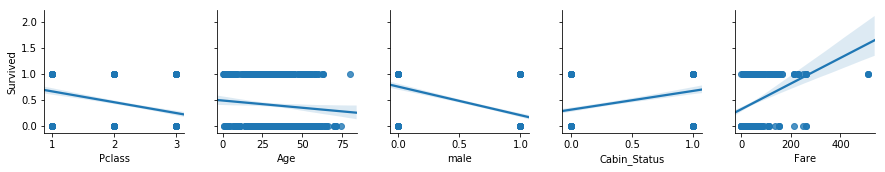

In [38]:
sns.pairplot(df_train,x_vars = ['Pclass','Age','male','Cabin_Status','Fare'],y_vars = 'Survived',kind = 'reg')

In [39]:
1/np.exp(-1.0135)

2.7552274550124793